# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', context='talk')
sns.set(rc={"figure.figsize": (8, 8)})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import HTML
css = open('../../style-table.css').read() + open('../../style-notebook.css').read()
HTML('<style>%s</style>' % css)

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)
tips.head()
tips.shape

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


(244, 8)

### Step 4. Delete the Unnamed 0 column

In [3]:
tips = tips.iloc[:, 1:]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

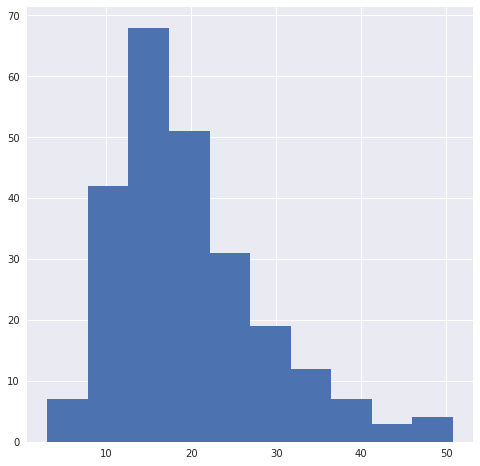

In [4]:
tips.total_bill.hist();

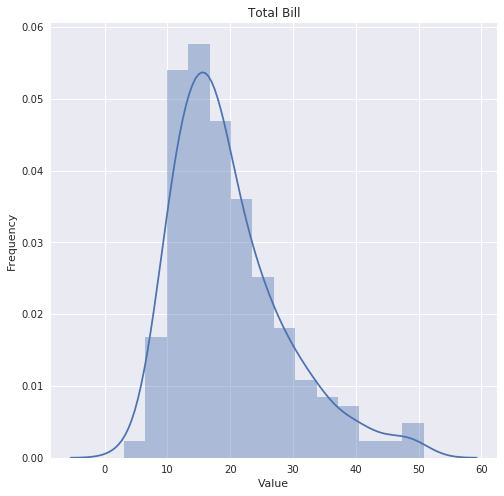

In [5]:
# Requires `statsmodels > 0.8.0`, otherwise set kde=False
ttbill = sns.distplot(tips.total_bill)
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")
sns.despine();

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

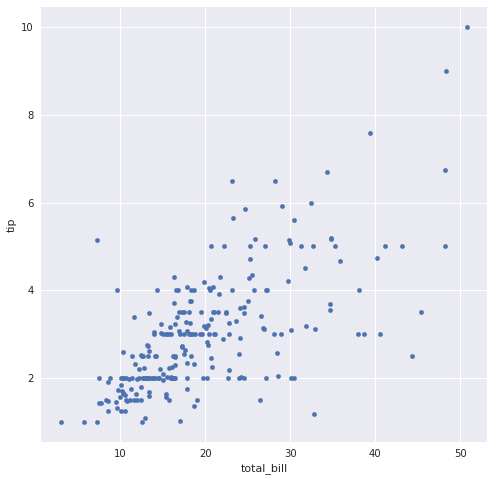

In [6]:
tips.plot('total_bill', 'tip', kind='scatter');

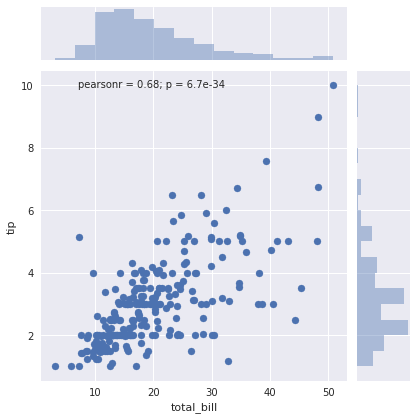

In [7]:
sns.jointplot(x="total_bill", y="tip", data=tips);

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

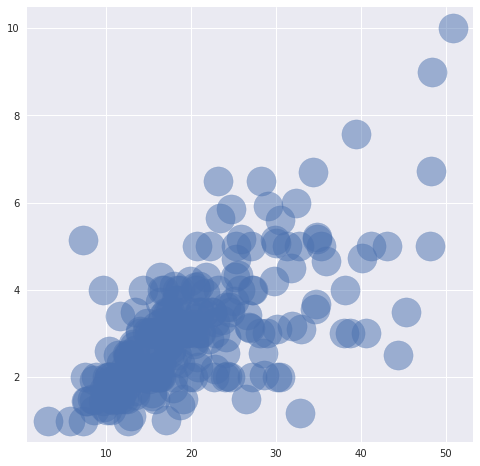

In [8]:
plt.scatter(tips.total_bill, tips.tip, s=tips.size*0.5, alpha=0.5);

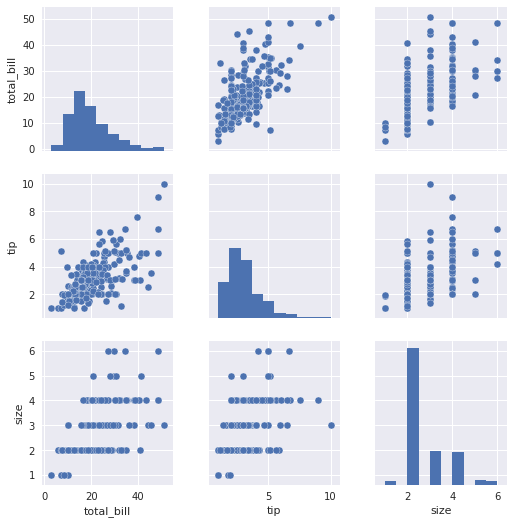

In [9]:
sns.pairplot(data=tips);

### Step 8. Present the relationship between days and total_bill value

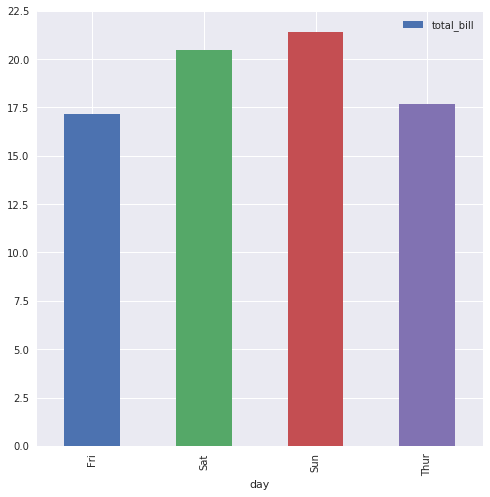

In [10]:
g = tips.groupby('day').mean()
g.reset_index().plot(x='day', y='total_bill', kind='bar');

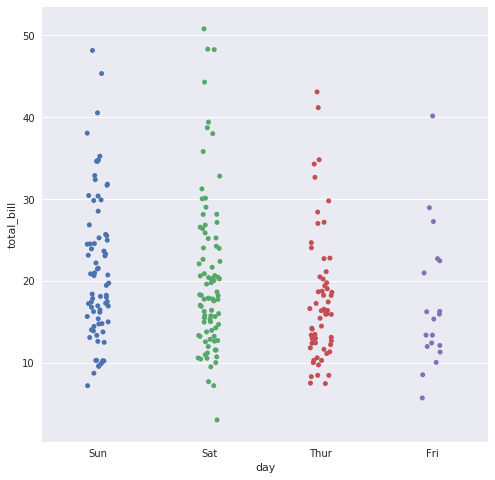

In [11]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

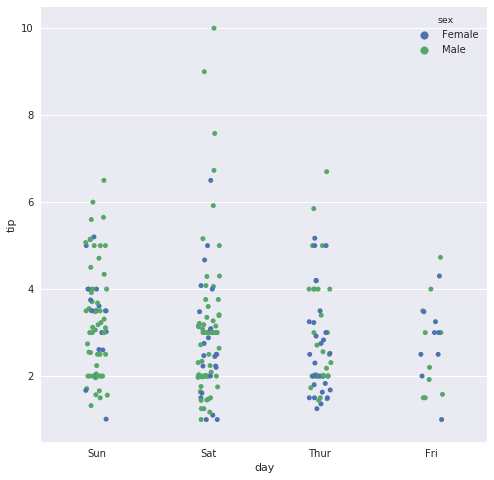

In [12]:
sns.stripplot(x="day", y="tip", hue="sex", data=tips, jitter=True);

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

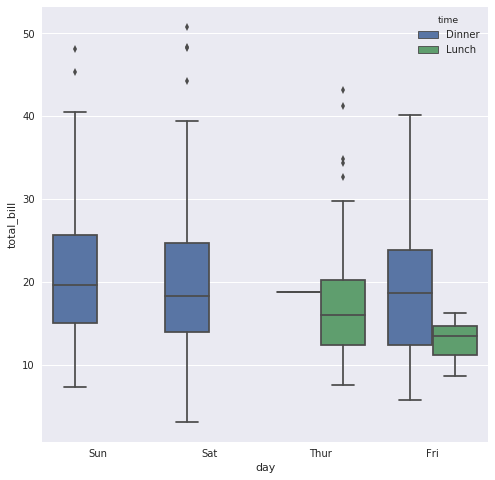

In [13]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

In [14]:
# To explain the strange chart above:
# "Sun" and "Sat" contain only time == "Dinner", while "Fri" and "Thur" have both.
tips.groupby(['day', 'time']).count()

total_bill  tip  sex  smoker  size
day  time                                      
Fri  Dinner          12   12   12      12    12
     Lunch            7    7    7       7     7
Sat  Dinner          87   87   87      87    87
Sun  Dinner          76   76   76      76    76
Thur Dinner           1    1    1       1     1
     Lunch           61   61   61      61    61

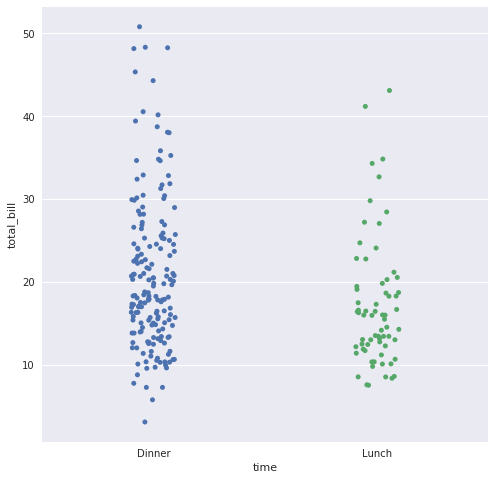

In [15]:
sns.stripplot(x="time", y="total_bill", data=tips, jitter=True);

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

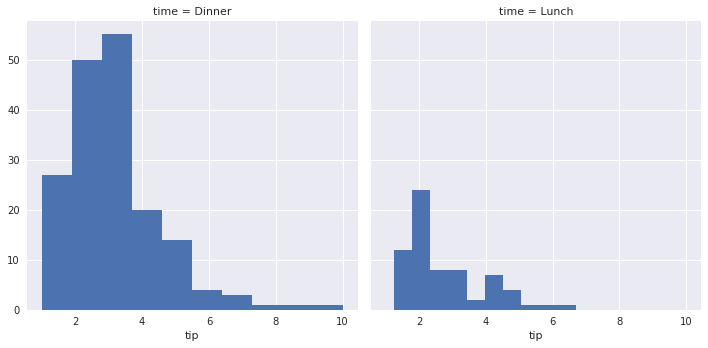

In [16]:
grid = sns.FacetGrid(tips, col="time", size=5)
grid.map(plt.hist, "tip");

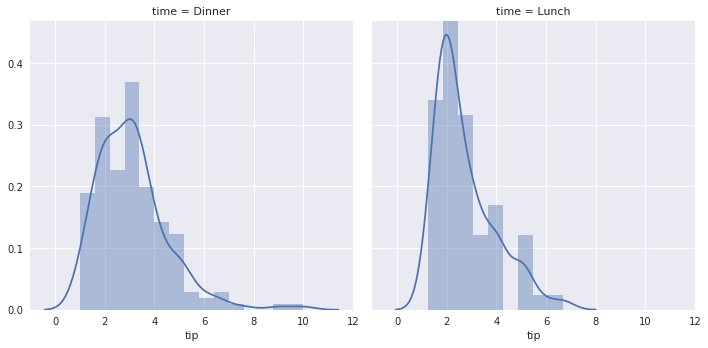

In [17]:
grid = sns.FacetGrid(tips, col='time', size=5)
grid.map(sns.distplot, 'tip');

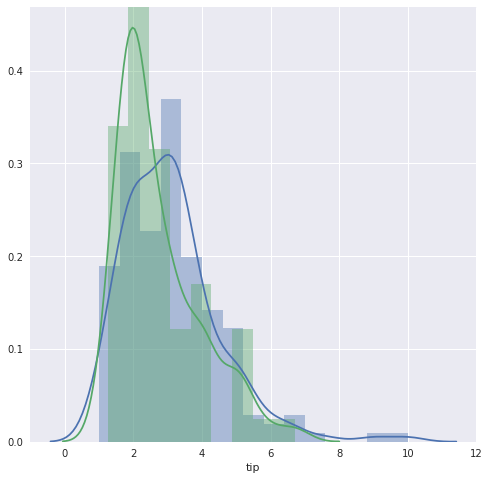

In [18]:
# on a single plot
sns.distplot(tips[tips.time == 'Dinner'].tip);
sns.distplot(tips[tips.time == 'Lunch'].tip);

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

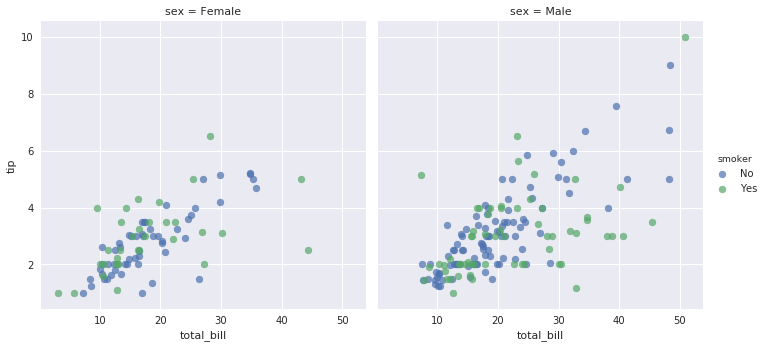

In [19]:
grid = sns.FacetGrid(tips, col="sex", hue="smoker", size=5)
grid.map(plt.scatter, "total_bill", "tip", alpha=0.7);
grid.add_legend();

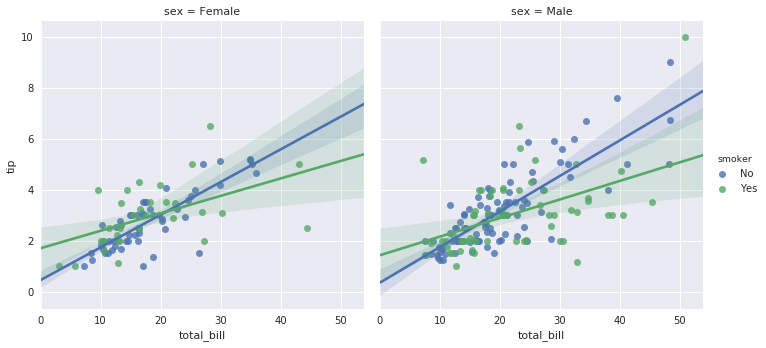

In [20]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker", col='sex');

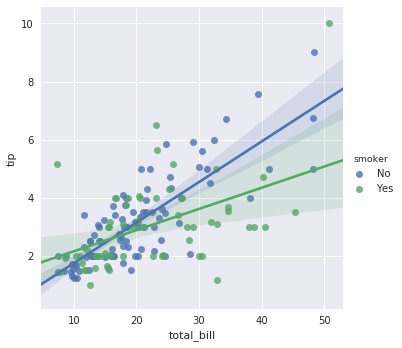

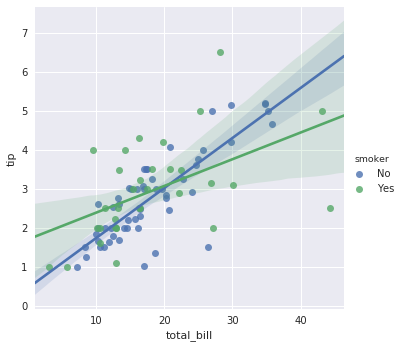

In [21]:
sns.lmplot(x="total_bill", y="tip", data=tips[tips.sex == 'Male'], hue="smoker");
sns.lmplot(x="total_bill", y="tip", data=tips[tips.sex == 'Female'], hue="smoker");

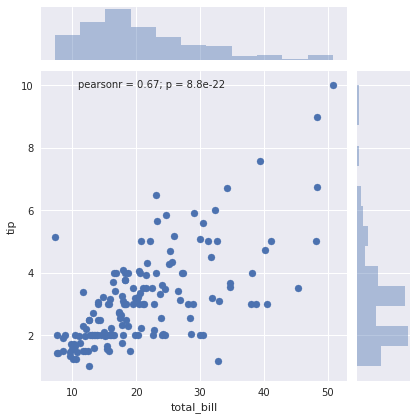

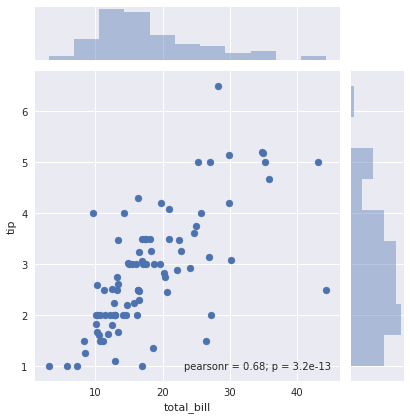

In [22]:
sns.jointplot(x="total_bill", y="tip", data=tips[tips.sex == 'Male']);
plt.show()
sns.jointplot(x="total_bill", y="tip", data=tips[tips.sex == 'Female']);

### BONUS: Create your own question and answer it using a graph.